In [5]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [6]:
passengers = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])].copy()

joint_counts = pd.crosstab(passengers["class"], passengers["embarked"])
print(joint_counts)

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [7]:
class_given_embarked = pd.crosstab(
    passengers["class"], passengers["embarked"], normalize="columns"
)
class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [8]:
embarked_given_class = pd.crosstab(
    passengers["embarked"], passengers["class"], normalize="columns"
)
embarked_given_class

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [9]:
p_S_given_3rd = embarked_given_class.loc["S", "3rd"]
p_S_given_3rd

np.float64(0.6967559943582511)

In [10]:
p_3rd_given_S = class_given_embarked.loc["3rd", "S"]
p_3rd_given_S

np.float64(0.5404814004376368)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

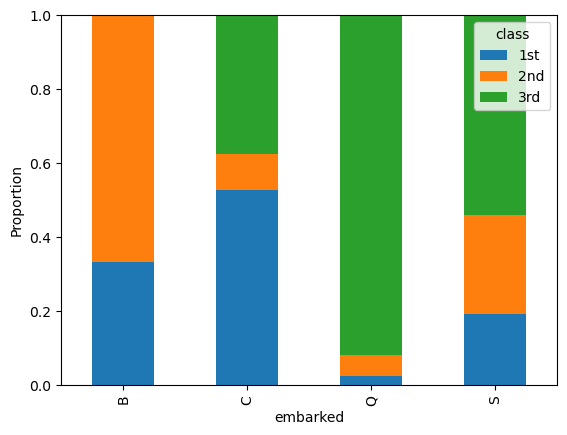

In [11]:
import matplotlib.pyplot as plt

class_given_embarked.T.plot.bar(stacked=True)
plt.ylabel("Proportion"); plt.ylim(0, 1)
plt.show()